<a href="https://colab.research.google.com/github/Heilley/Grocery_Sales_Prediction/blob/main/Project1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT 1, PART 2, Halima Bulama-Ladan, 05/02/2022**

**Grocery store sales prediction**




In [81]:
import pandas as pd
filename=pd.read_csv("/content/sales_predictions.csv", index_col =0)
df = filename
df.head (3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


**Dispay of basic data information**

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [121]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [83]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

**Checking for duplicate enteries.**

In [85]:
df.duplicated().sum()

0

**Checking for null values**

In [86]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
null_values =df.isna().sum()
null_values[null_values>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

**Graphical display of dataframe revealing two columns, Item_Weight and Outlet_Size to contain missing values**

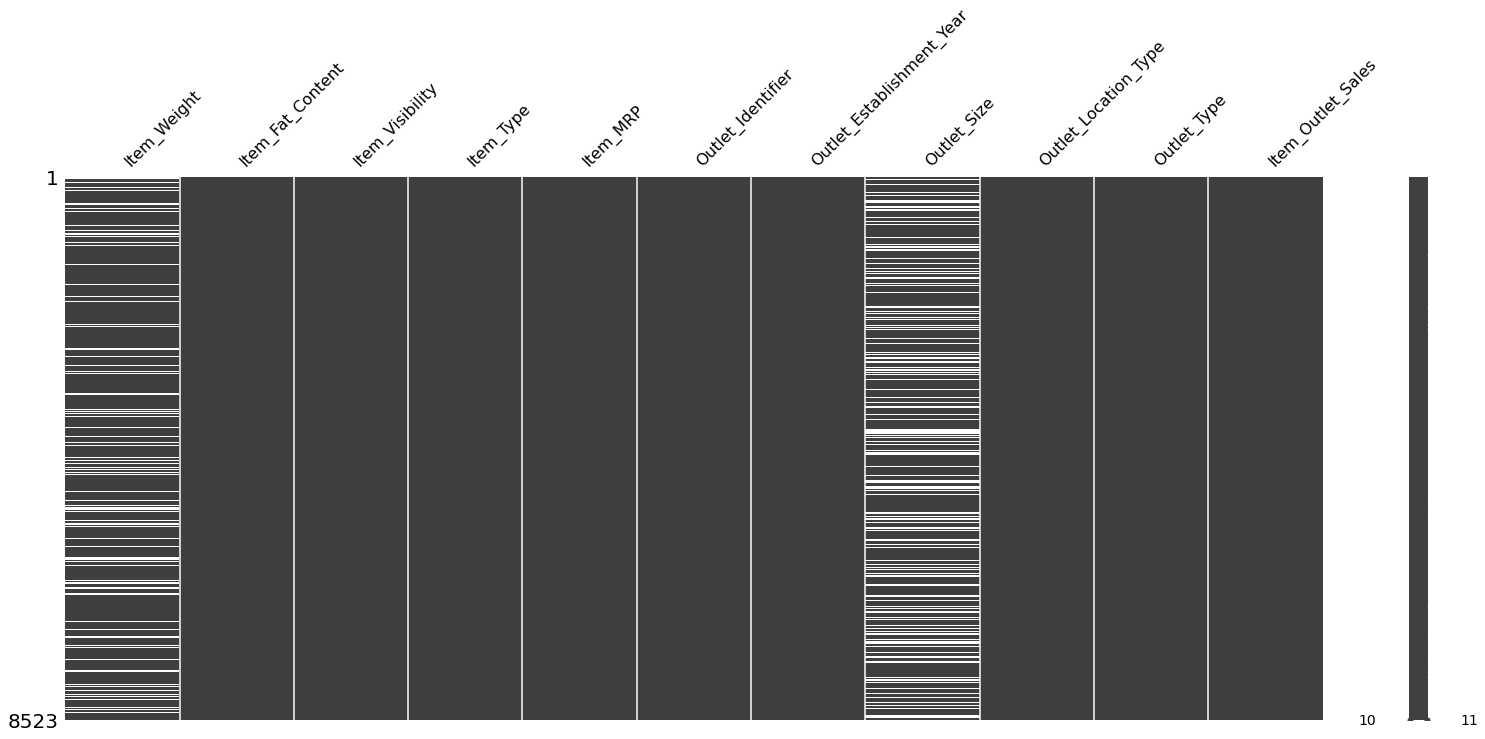

In [88]:
import missingno as miss
miss.matrix(df)


The missing values are located all over the two columns. In my opinion, the columns outlet_size and item_weight might be of relevance to the prediction of sales, so rather than dropping the columns, it is wiser to fill the null values with thier median occuring value.

In [89]:
Item_weight_rep = round(df["Item_Weight"].median())
Item_weight_rep

13

In [90]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = 13)
df['Item_Weight'].isna().sum()

0

In [91]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [92]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = "Medium")
df['Outlet_Size'].isna().sum()

0

A graphical display of dataframe that there are no more missing values.





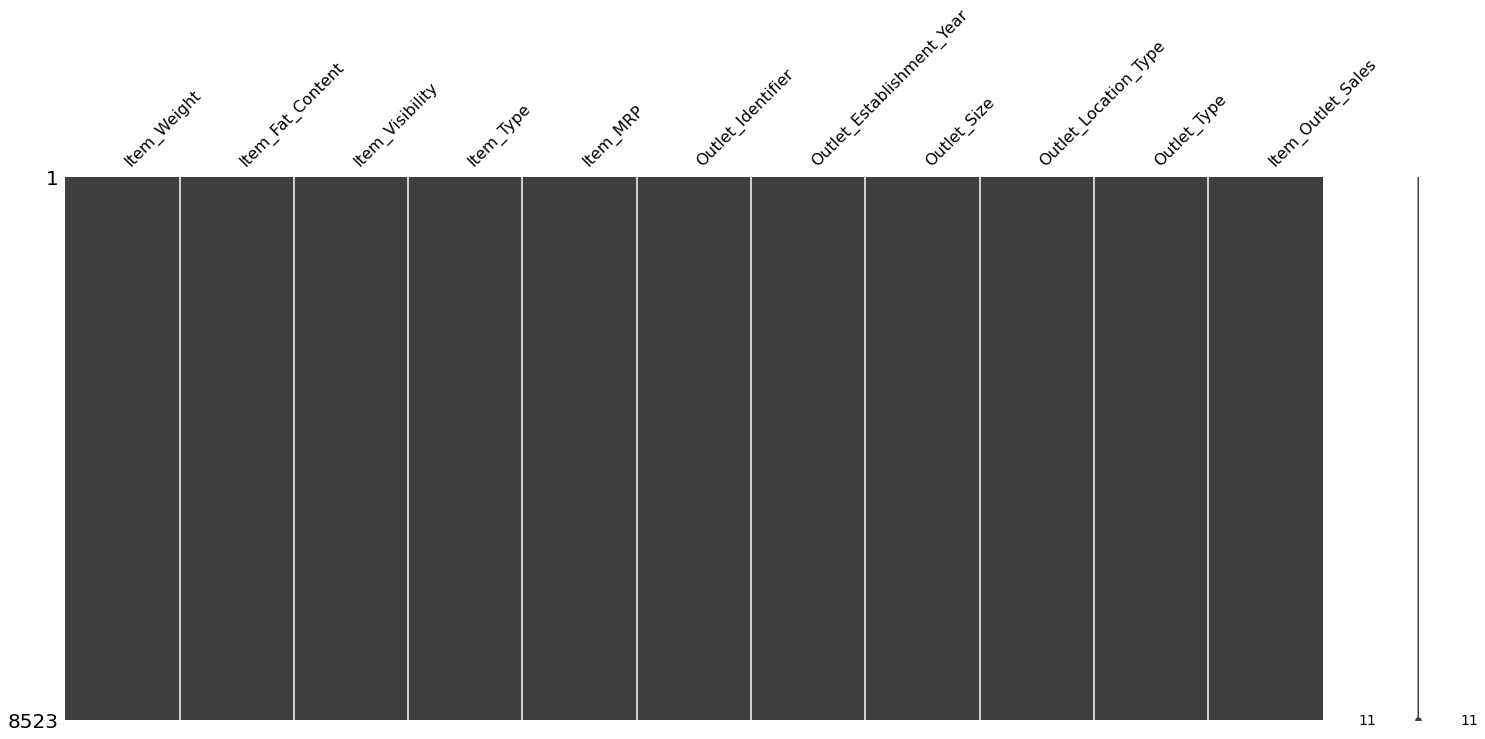

In [93]:
miss.matrix(df)

In [94]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Checking and fixing of consistency in categories of data (columns with object datatypes).**

In [126]:
df['Item_Fat_Content']  = df['Item_Fat_Content'].str.capitalize()
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

In [128]:
df['Item_Fat_Content'] .replace ({'Lf' : 'Low fat'}, inplace = True)
df['Item_Fat_Content'] .replace ({'Low Fat' : 'Low fat'}, inplace = True)
df['Item_Fat_Content'] .replace ({'Reg' : 'Regular'}, inplace = True)
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

In [123]:
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

In [122]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [125]:
df['Outlet_Identifier'].unique() 

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [114]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [115]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [116]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

**Summary Statistics of numerical columns.**

In [96]:
df.loc[:,['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.882081,0.066132,140.992782,1997.831867,2181.288914
std,4.226465,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,13.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
